# Warm-Up

1. [Task 1](#1)<br>
2. [Task 2](#2)<br>
3. [Task 3](#3)<br>

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge
from sklearn.metrics import mean_absolute_error as mae
sns.set()
%matplotlib inline

***

## Task 1
<a id="1" > 

The first task consists of fitting the following equation to a set of 50 x/y data points using the polyfit() function from Numpy.
Perform the following steps:

- Fit the equation using polyfit() and print the a, b parameters.
- Plot your model with the 50 data points, i.e., the curve that corresponds to the equation from above.
- Compute and print the R-squared coefficient using Numpy.
- Explain how the polyfit() function finds the optimal parameters (1-2 sentences)
- Give two differences between this method and the gradient descent one. Write a short sentence for each one.

Write your solution to each point in a new code cell. You can use markdown cells for the last two points.

In [3]:
df_1 = pd.read_csv('task-1.csv')
df_1.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [4]:
x_1 = df_1.x.values
y_1 = df_1.y.values

coefs_1 = np.polyfit(np.log(x_1),y_1, deg=1)
a_1, b_1 = coefs_1

print(a_1, b_1)

(3.3902409977137995, 31.52920121929614)


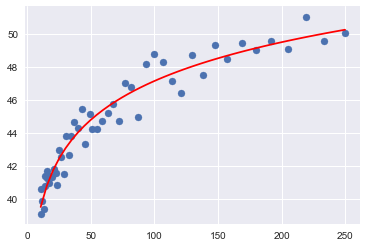

In [5]:
x_values_1 = np.linspace(x_1.min(), x_1.max(), num=len(x_1))
y_values_1 = np.polyval(coefs_1, np.log(x_values_1))

plt.scatter(x_1,y_1)
plt.plot(x_values_1, y_values_1, color='red', label='po1yfit(deg=1)')


plt.show()

In [6]:
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y,y_pred)))

rss_baseline_1 = RSS(y_1, y_1.mean())
rss_model_1 = RSS(y_1, y_values_1)

R2_1 = 1 - (rss_model_1 / rss_baseline_1)
print(R2_1)

0.22494042169406037


Polyfit tries to model the relationship between two variables with a polynomial equation. There is an intercept term b which describes the value of our function when x = 0. And there is also the term a which gives us the slope of our function. The degree of our polynomial describes the power of the variable x.

Unlike polyfit, gradient descent uses a learning rate and the gradient of the loss function to compute the parameters
update. It is an iterative algorithm that takes small steps in the opposite direction of the gradient.

***

## Task 2
<a id="2" > 

In the second task, you have to fit a linear regression model to a data set which contains outliers. This time, you can use the estimators from the Scikit-learn library. The data consists of three features x1, x2, x3 and a target variable y.

Perform the following steps:

- Load and split the data into 80-20 train/test sets using train_test_split(). Set the random_state to zero.
- Fit and evaluate a linear regression using the train/test set methodology. Print the mean absolute error (MAE) on the test set.
- Improve your test MAE by removing outliers from the train set.
- Fit a linear regression with Huber loss (using the train points with outliers). Print its MAE on the test set.

There are two ways to remove the outliers:
- Remove them manually using a logical expression. For instance, x1 should be between _ and _, x2 between _ and _, and x3 between _ and _
- Automatically using z-scores. For instance, z-scores of the x1, x2 and x3 variables should be between _ and _

If you choose to remove the outliers manually, you can plot histograms to define the range of reasonable values for each variable. If you decide to remove them using z-scores, you can set a condition on the absolute values, e.g., abs(z-scores) < 2.



In [7]:
df_2 = pd.read_csv('task-2.csv')
df_2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [8]:
train_df, test_df = train_test_split(
df_2, train_size=0.8, test_size=0.2, random_state=0)

print('Train DataFrame:', train_df.shape)
print('TestDataFrame:', test_df.shape)

X_tr = train_df.drop('y', axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop('y', axis=1).values
y_te = test_df.y.values

('Train DataFrame:', (800, 4))
('TestDataFrame:', (200, 4))


In [9]:
# Linear regression
lr = LinearRegression()
lr.fit(X_tr,y_tr) 
y_pred_1r = lr.predict(X_te)

print ('Coefficients:', lr.coef_)
print ('Intercept:', lr.intercept_)

('Coefficients:', array([ 3.18946219,  0.72611244, -0.29586984]))
('Intercept:', 1982.1964160299176)


In [10]:
mae_lr = mae(y_te, y_pred_1r)
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE linear regression: 104.788


In [11]:
# Removing Outliers
train_df_no_outliers = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

X_tr_n_o = train_df_no_outliers.drop('y', axis=1).values
y_tr_n_o = train_df_no_outliers.y.values

In [12]:
# Linear regression without ourliers
lr = LinearRegression()
lr.fit(X_tr_n_o, y_tr_n_o)
y_pred_1r_n_o = lr.predict(X_te)
    
mae_lr = mae(y_te, y_pred_1r_n_o)
print('MAE linear regression (without outliers): {:.3f}'.format(mae_lr))

MAE linear regression (without outliers): 70.997


In [13]:
# Huber loss
huber = HuberRegressor()
huber.fit(X_tr, y_tr) 
y_pred_huber = huber.predict(X_te)

mae_huber= mae(y_te, y_pred_huber) 
print('MAE Huber: {:.3f}'.format(mae_huber))

MAE Huber: 83.908


***

## Task 3
<a id="3" > 

The goal of the third task is to fit a polynomial regression of degree 10 to the following set of 50 x/y data points. You will have to apply regularization to avoid overfitting.

Your code should include the following steps:

- Split data into 50-50 train/test sets using train_test_split(). Set the random_state to zero.
- Fit a polynomial of degree 10 to the train set. Print its residual sum of squares (RSS) on the train/test sets. Does your model overfit?
- Plot your model with the 50 data points, i.e., the curve that corresponds to your polynomial regression.
- Apply regularization using ridge regression. Tune the regularization strength using grid search.
- Compute the train/test RSS of your (tuned) ridge regression model and plot the new curve.



In [14]:
df_3 = pd.read_csv('task-3.csv')
df_3.head()

,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


In [15]:
x_3 = df_3.x.values
y_3 = df_3.y.values

In [16]:
# We create polynomial features
poly_obj = PolynomialFeatures(degree=10,include_bias=False)
X_poly = poly_obj.fit_transform(x_3[:,np.newaxis])

x_tr_3, x_te_3, y_tr_3, y_te_3 = train_test_split(X_poly, y_3, train_size=0.5, test_size=0.5, random_state=0)

In [17]:
lr_3 = LinearRegression()
lr_3.fit(x_tr_3, y_tr_3)

y_tr_3_pred = lr_3.predict(x_tr_3)
y_te_3_pred = lr_3.predict(x_te_3)

print('RSS on our train data: {:.3f}'.format(RSS(y_tr_3,y_tr_3_pred)))
print('RSS on our test data: {:.3f}'.format(RSS(y_te_3,y_te_3_pred)))

RSS on our train data: 0.684
RSS on our test data: 1.514


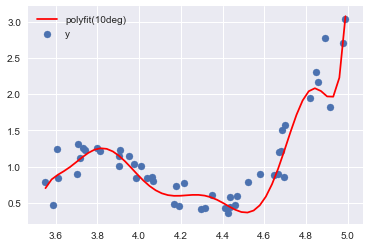

In [18]:
x_line = np.linspace(min(x_3), max(x_3), num=len(df_3))
x_line_poly = poly_obj.fit_transform(x_line[:,np.newaxis])
y3_model = lr_3.predict(x_line_poly)


plt.scatter(data = df_3, x='x', y='y')
plt.plot(x_line, y3_model,color='red', label='polyfit(10deg)')
plt.legend()
plt.show()

/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.72685037297e-23 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.20587708455e-22 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.070815887e-22 / 1.11022302463e-16
  RuntimeWarning)
/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition 

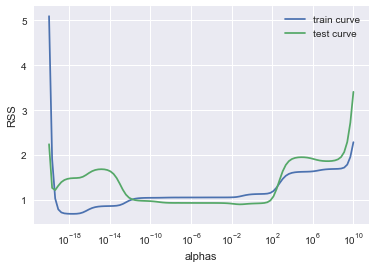

In [19]:
alphas = np.logspace(-20,10,num=100)

train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_tr_3, y_tr_3)
    
    y_tr_3_pred = ridge.predict(x_tr_3)
    train_scores.append(RSS(y_tr_3, y_tr_3_pred))
    
    y_te_3_pred = ridge.predict(x_te_3)
    test_scores.append(RSS(y_te_3, y_te_3_pred))

# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.xlabel('alphas')
plt.ylabel('RSS')
plt.legend()
plt.show()

In [20]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression 2 - RSS train: {:.3f}, RSS test: {:.3f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 6.1e-02
Ridge regression 2 - RSS train: 1.076, RSS test: 0.900


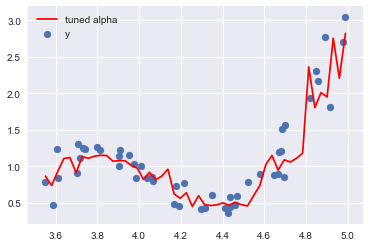

In [21]:
ridge2 = Ridge(best_alpha)
ridge2.fit(x_tr_3, y_tr_3)

# Plot model
y_values_ridge = ridge2.predict(X_poly)
x_line = np.linspace(min(x_3), max(x_3), num=len(df_3))

plt.scatter(data=df_3, x='x', y='y')
plt.plot(x_line, y_values_ridge, color='red', label='tuned alpha')
plt.legend()
plt.show()